In [70]:
import networkx as nx
import editdistance
import numpy as np
import matplotlib.pyplot as plt

import scripts.utils as u

In [71]:
G = u.get_graph()

In [72]:
optimal_path = nx.shortest_path(G,source=1, target=14, weight="weight")
optimal_path

[1, 19, 33, 14]

In [73]:
weights = u.get_all_weights(G)

In [74]:
np.random.seed(0)
median_path, sample_paths = u.get_median_and_sampled_paths(G, weights)
dists = [editdistance.eval(optimal_path, sample_path) for sample_path in sample_paths]

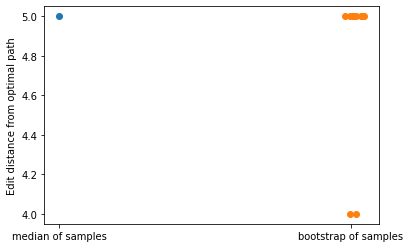

In [75]:
plt.plot([0], editdistance.eval(optimal_path, median_path), 'o')
plt.plot(np.array([1]*len(dists)) +.02*np.random.randn(len(dists)), dists, 'o')
plt.xticks([0,1], ['median of samples', 'bootstrap of samples'])
plt.ylabel("Edit distance from optimal path");

In [76]:
np.median(dists)

5.0

In [77]:
all_optimal_paths = nx.shortest_path(G,weight="weight")

In [78]:
all_median_paths, all_sample_paths = u.get_all_median_and_sampled_paths(G, weights)

In [81]:
nodes = list(all_optimal_paths.keys())

median_dists = []
bootstrapped_dists = []
for s in nodes:
    for t in nodes:
        optimal_path = all_optimal_paths[s][t]
        median_path = all_median_paths[s][t]
        median_dists.append(editdistance.eval(optimal_path, median_path))
        for sample_path in all_sample_paths:
            bootstrapped_dists.append(editdistance.eval(optimal_path, sample_path[s][t]))


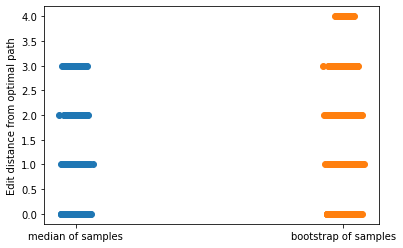

In [62]:
plt.plot(np.array([0]*len(median_dists)) +.02*np.random.randn(len(median_dists)), 
         median_dists, 'o')
plt.plot(np.array([1]*len(bootstrapped_dists)) +.02*np.random.randn(len(bootstrapped_dists)), 
         bootstrapped_dists, 'o')
plt.xticks([0,1], ['median of samples', 'bootstrap of samples'])
plt.ylabel("Edit distance from optimal path");